In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
import re
import string
from wordcloud import WordCloud
from collections import Counter

In [3]:
import warnings
warnings.filterwarnings('ignore')
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [4]:
data = pd.read_excel('/Users/shoukoushi/Library/CloudStorage/OneDrive-GraphicEraUniversity/dataset.xlsx')
data.head()

,text,label
0,oh my gosh,0.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [5]:
print(data.shape)

(6982, 2)


In [6]:
data.isnull().sum()

text     10
label     2
dtype: int64

In [7]:
data=data.dropna(how='any')

In [8]:
data['label'].value_counts()

0.0    5733
1.0    1237
Name: label, dtype: int64

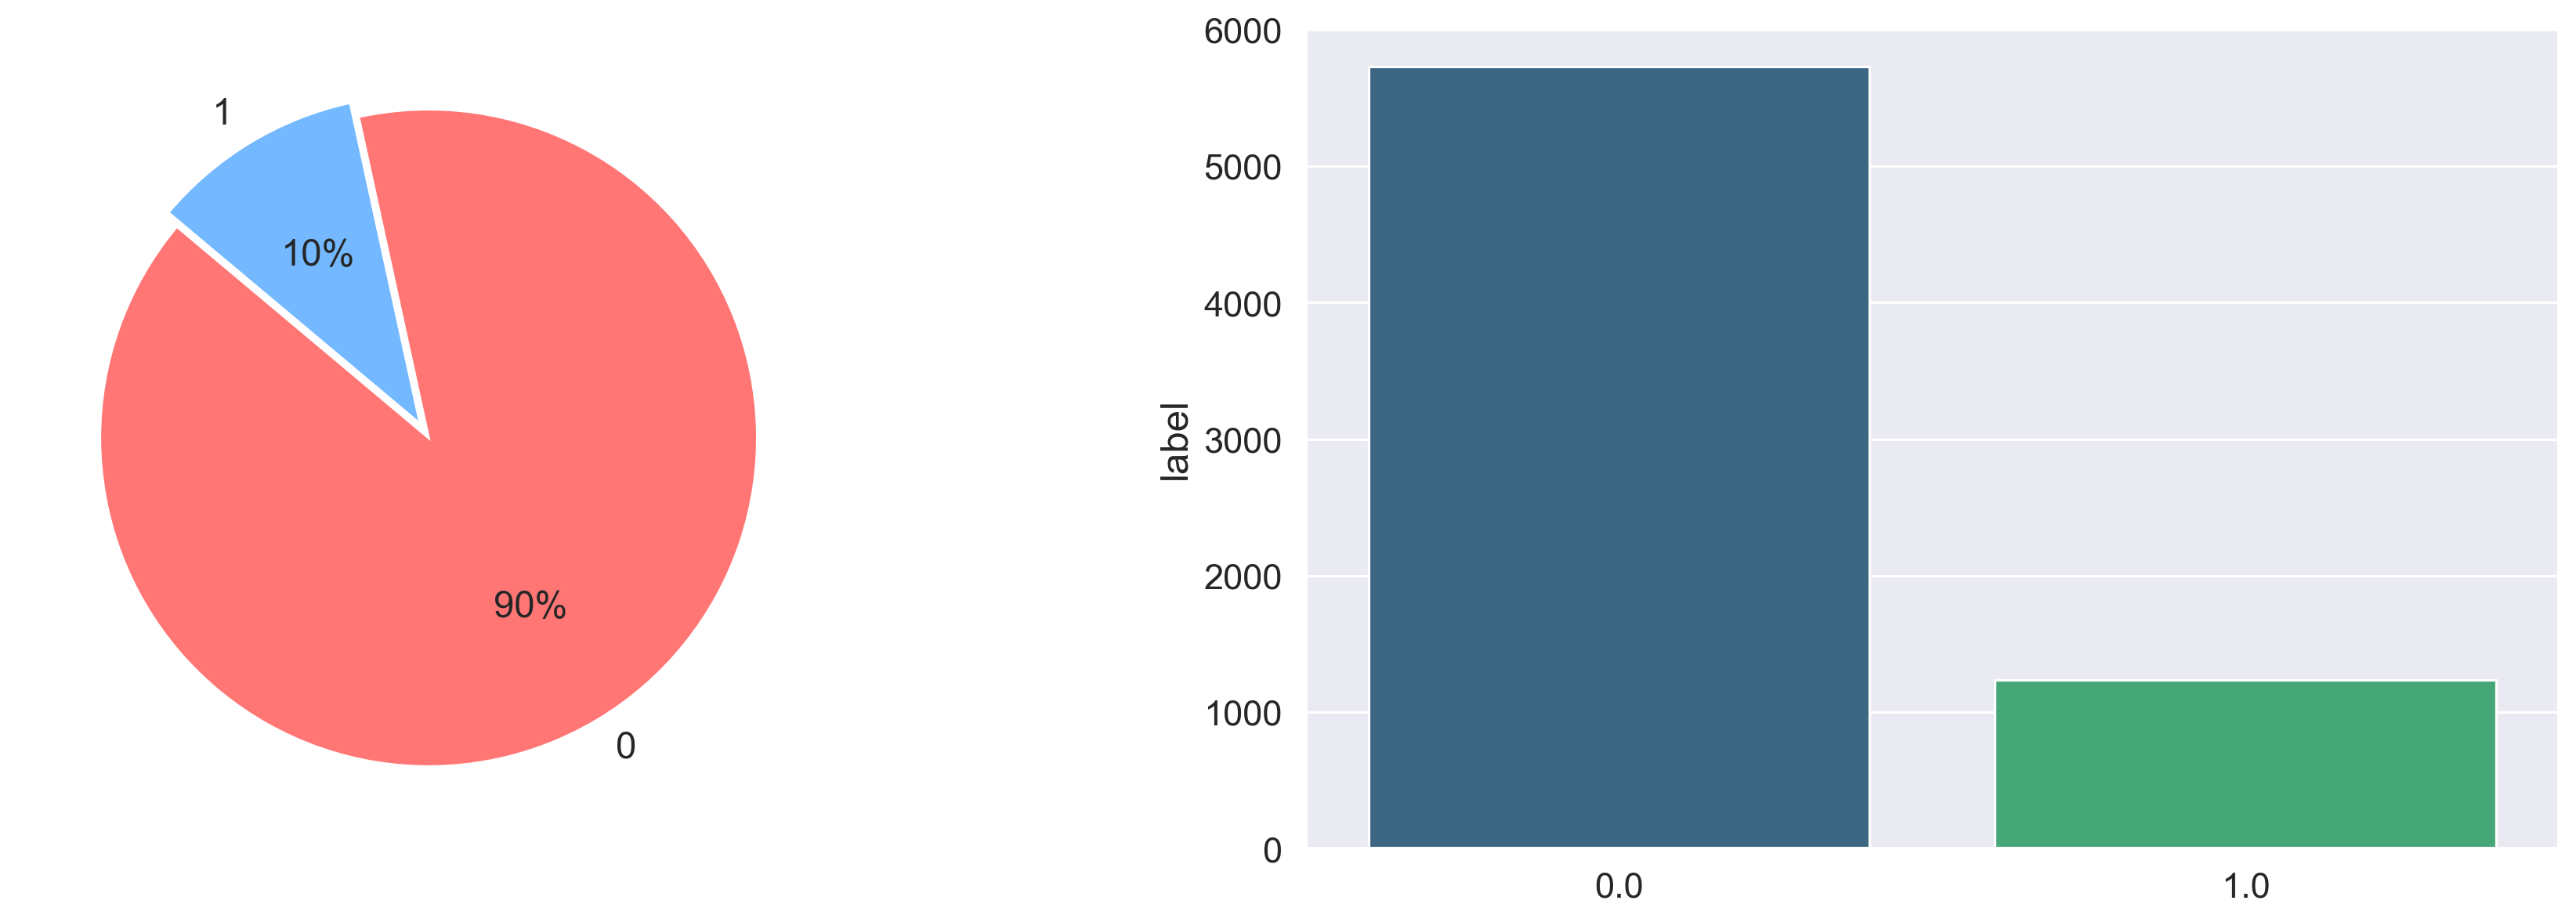

In [25]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data['label'].unique(), y = data['label'].value_counts(), palette= 'viridis')

plt.show()

In [10]:
data['Total Words'] = data['text'].apply(lambda x: len(x.split()))

def count_total_words(text):
    char = 0
    for word in text.split():
        char += len(word)
    return char

data['Total Chars'] = data["text"].apply(count_total_words)

In [11]:
data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,0.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


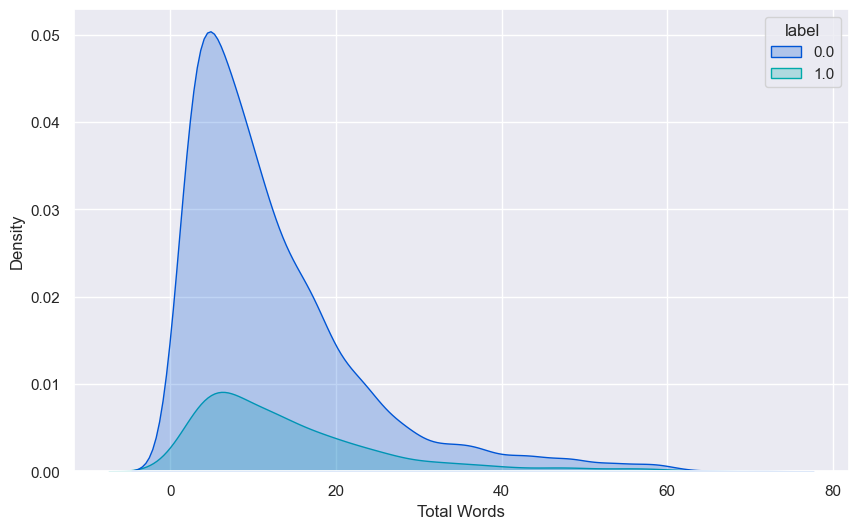

In [12]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Words'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

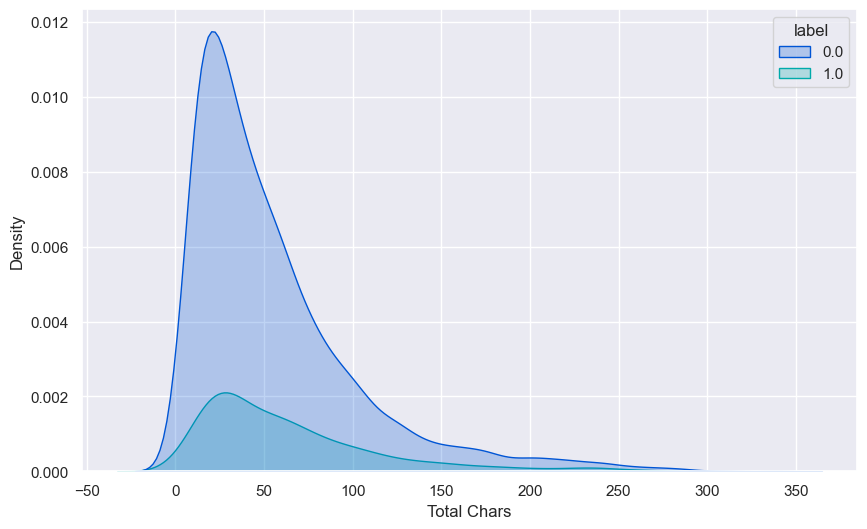

In [13]:
plt.figure(figsize = (10, 6))
sns.kdeplot(x = data['Total Chars'], hue= data['label'], palette= 'winter', shade = True)
plt.show()

In [14]:
data.head()

,text,label,Total Words,Total Chars
0,oh my gosh,0.0,3,8
1,"trouble sleeping, confused mind, restless hear...",1.0,10,55
2,"All wrong, back off dear, forward doubt. Stay ...",1.0,14,65
3,I've shifted my focus to something else but I'...,1.0,11,51
4,"I'm restless and restless, it's been a month n...",1.0,14,59


In [15]:
def convert_lowercase(text):
    text = text.lower()
    return text

data['text'] = data['text'].apply(convert_lowercase)

In [16]:
def remove_url(text):
    re_url = re.compile('https?://\S+|www\.\S+')
    return re_url.sub('', text)

data['text'] = data['text'].apply(remove_url)

In [17]:
exclude = string.punctuation

def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

data['text'] = data['text'].apply(remove_punc)

In [18]:
def remove_stopwords(text):
    new_list = []
    words = word_tokenize(text)
    stopwrds = stopwords.words('english')
    for word in words:
        if word not in stopwrds:
            new_list.append(word)
    return ' '.join(new_list)

data['text'] = data['text'].apply(remove_stopwords)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/shoukoushi/nltk_data'
    - '/opt/anaconda3/nltk_data'
    - '/opt/anaconda3/share/nltk_data'
    - '/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [26]:
data['Total Words After Transformation'] = data['text'].apply(lambda x: np.log(len(x.split())))

In [27]:
data.head()

,text,label,Total Words,Total Chars,Total Words After Transformation
0,oh my gosh,0.0,3,8,1.098612
1,trouble sleeping confused mind restless heart ...,1.0,10,55,2.302585
2,all wrong back off dear forward doubt stay in ...,1.0,14,65,2.639057
3,ive shifted my focus to something else but im ...,1.0,11,51,2.397895
4,im restless and restless its been a month now ...,1.0,14,59,2.639057


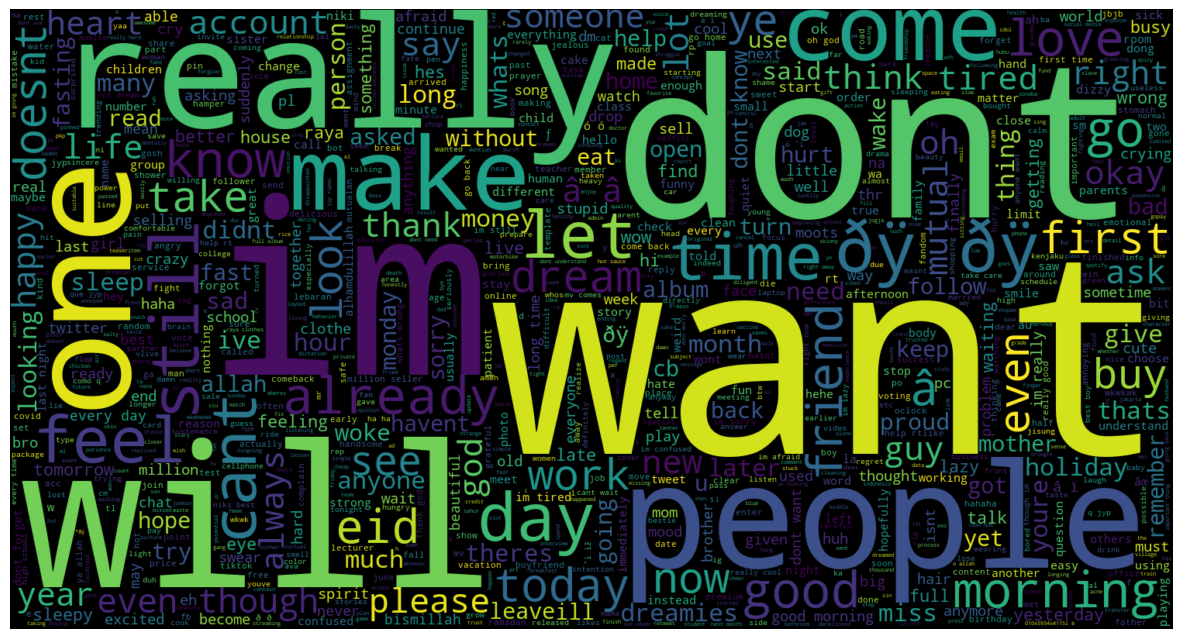

In [28]:
text = " ".join(data[data['label'] == 0]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=1000, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

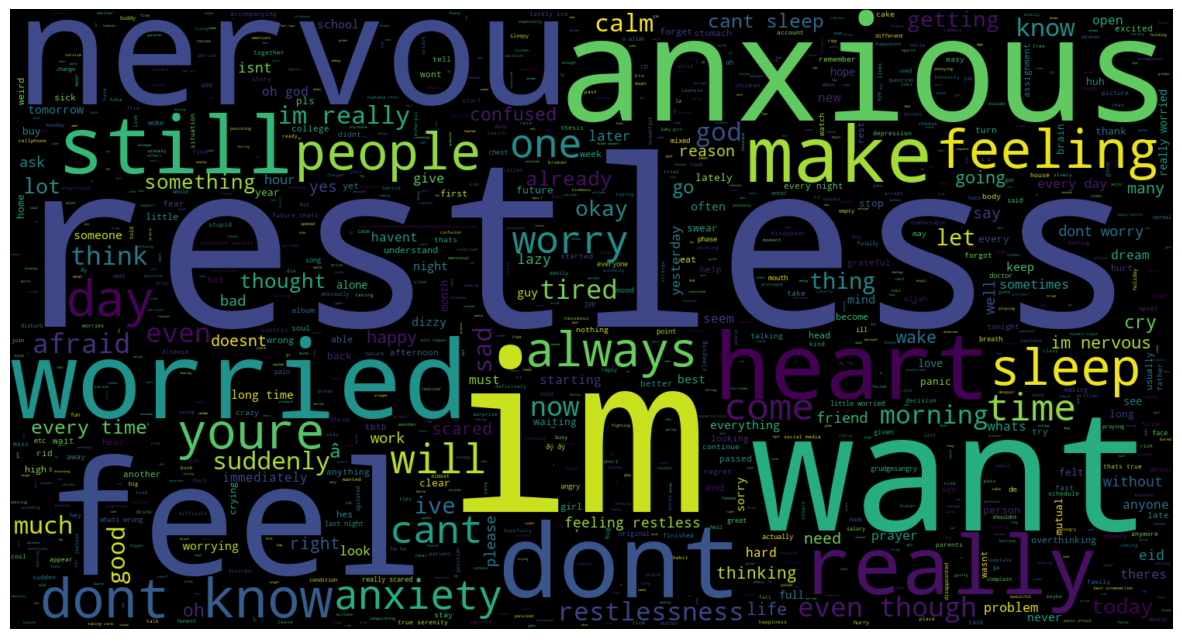

In [29]:
text = " ".join(data[data['label'] == 1]['text'])
plt.figure(figsize = (15, 10))
wordcloud = WordCloud(max_words=1000, height= 800, width = 1500,  background_color="black", colormap= 'viridis').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

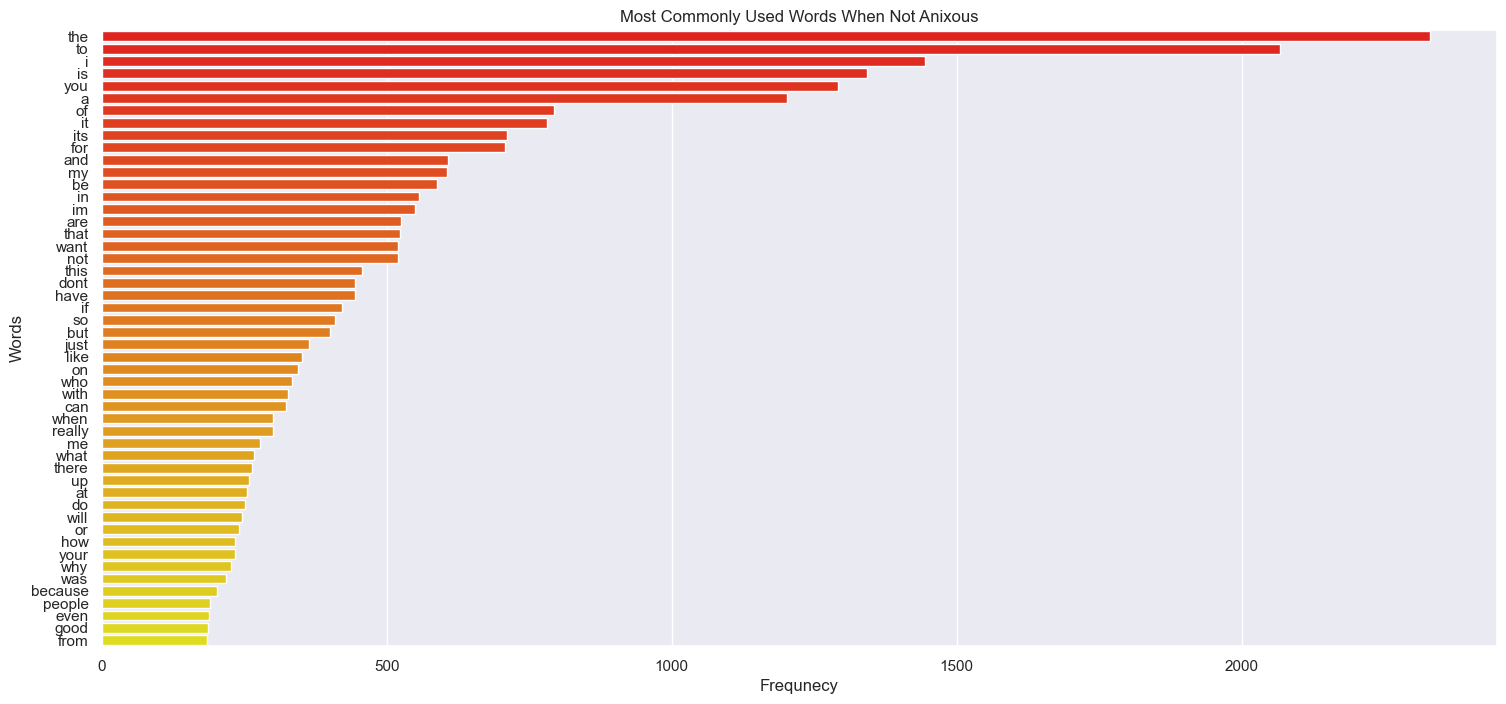

In [33]:
all_noanx_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_noanx_words.append(word)

df = pd.DataFrame(Counter(all_noanx_words).most_common(50), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'autumn')
plt.title("Most Commonly Used Words When Not Anixous")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

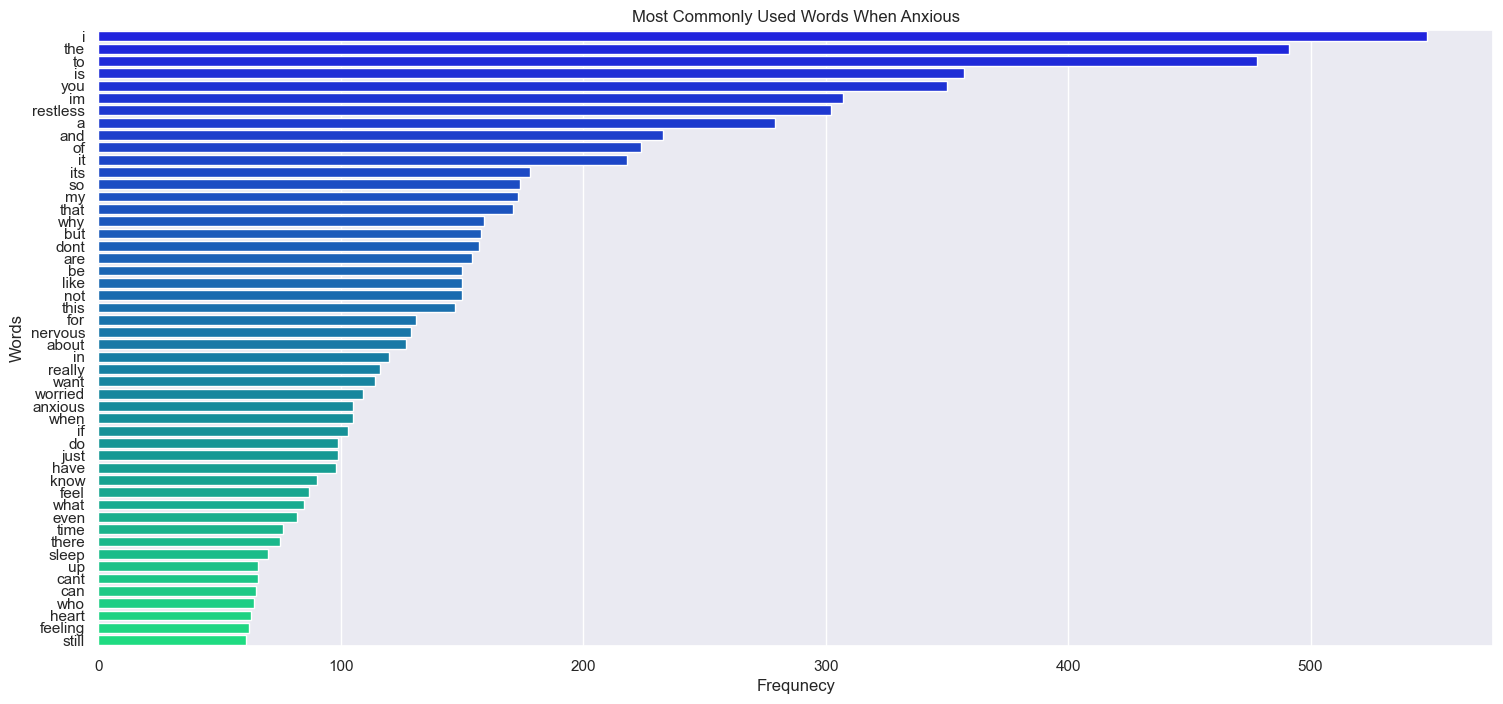

In [34]:
all_anx_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_anx_words.append(word)

df = pd.DataFrame(Counter(all_anx_words).most_common(50), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'winter')
plt.title("Most Commonly Used Words When Anxious")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [35]:
X = data["text"]
y = data['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify = y)

In [36]:
tfidf = TfidfVectorizer(max_features= 2500, min_df= 2)
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

In [37]:
def train_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    accuracy = round(accuracy_score(y_test, y_pred), 3)
    precision = round(precision_score(y_test, y_pred), 3)
    recall = round(recall_score(y_test, y_pred), 3)

    print(f'Accuracy of the model: {accuracy}')
    print(f'Precision Score of the model: {precision}')
    print(f'Recall Score of the model: {recall}')

    sns.set_context('notebook', font_scale= 1.3)
    fig, ax = plt.subplots(1, 2, figsize = (25,  8))
    ax1 = plot_confusion_matrix(y_test, y_pred, ax= ax[0], cmap= 'YlGnBu')
    ax2 = plot_roc(y_test, y_prob, ax= ax[1], plot_macro= False, plot_micro= False, cmap= 'summer')


Accuracy of the model: 0.872
Precision Score of the model: 0.947
Recall Score of the model: 0.291


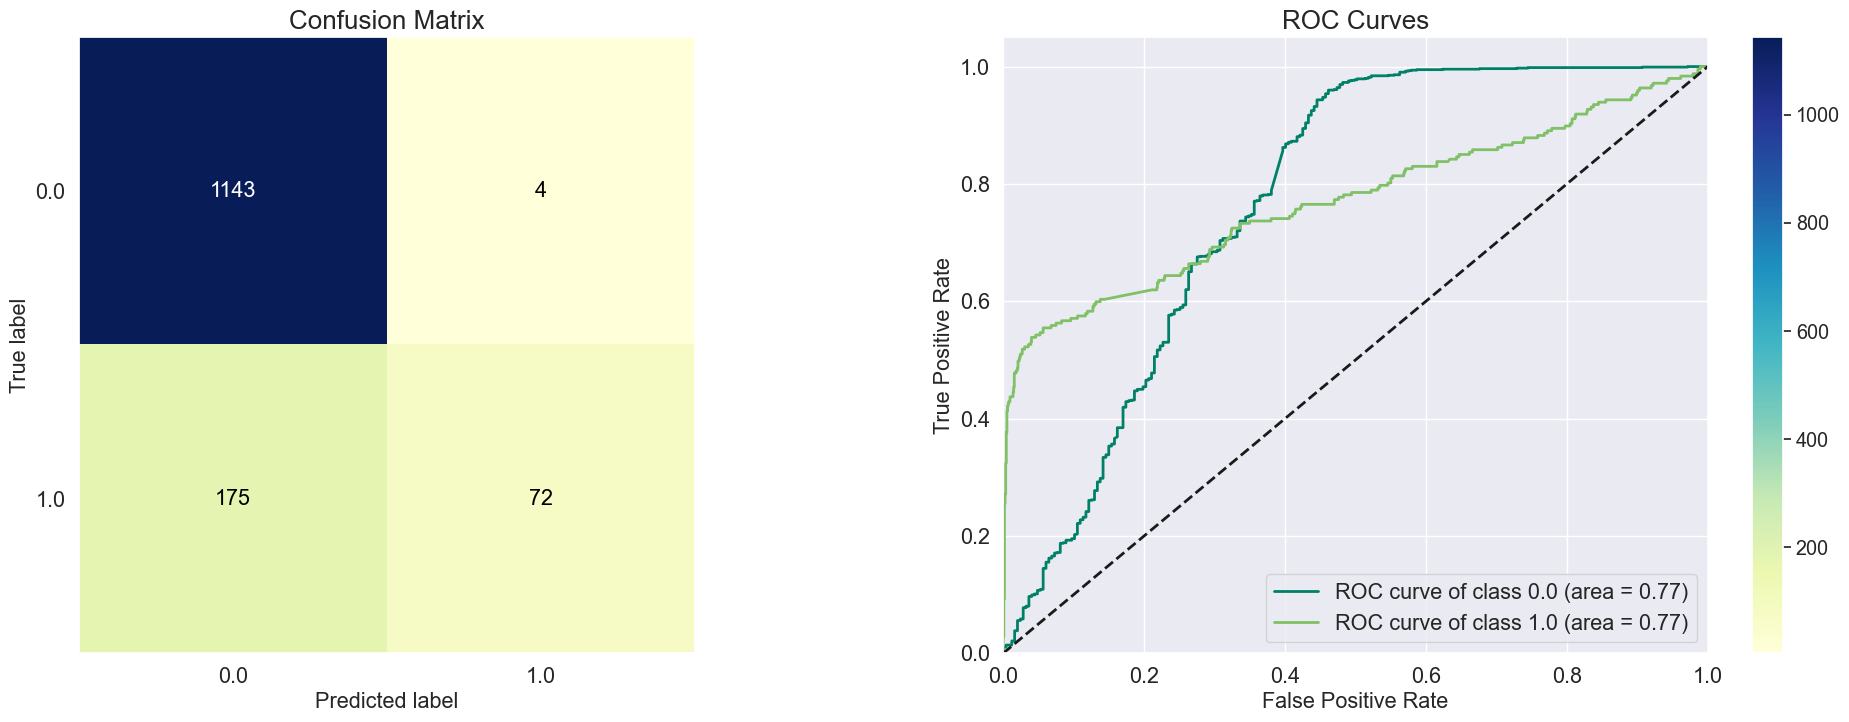

In [38]:
nb = MultinomialNB()
train_model(nb)

Accuracy of the model: 0.917
Precision Score of the model: 0.928
Recall Score of the model: 0.575


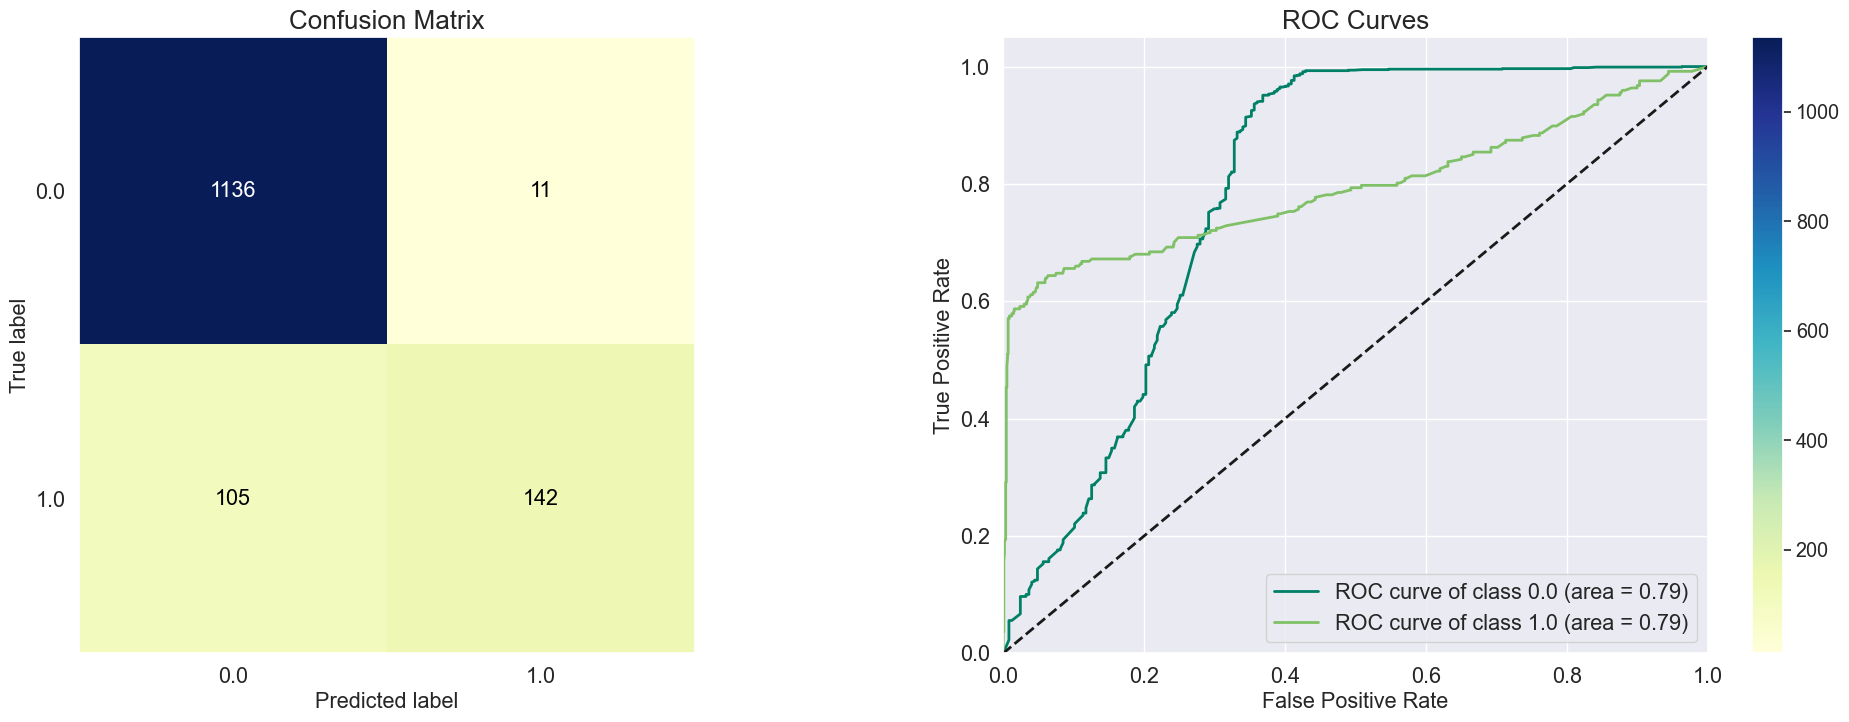

In [39]:
rf = RandomForestClassifier(n_estimators= 300)
train_model(rf)